In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

# Load datasets
regression_1 = pd.read_csv("regression_1.csv")
regression_2 = pd.read_csv("regression_2.csv")
classification = pd.read_csv("classification.csv")

print(regression_1.head())
print(regression_2.head())
print(classification.head())

    x1        x2
0  0.0 -0.674904
1  0.1 -0.479806
2  0.2 -0.806082
3  0.3  0.053077
4  0.4 -0.393342
     x1        x2
0 -10.0  0.070295
1  -9.0 -0.045762
2  -8.0  0.044281
3  -7.0 -0.012570
4  -6.0  0.208319
          x1        x2  label
0 -10.097950 -3.230260      1
1  -2.255579  5.107107      0
2 -10.562037 -3.919005      1
3  -0.126070  3.079037      0
4  -9.249422 -4.100176      1


<Axes: xlabel='x1', ylabel='x2'>

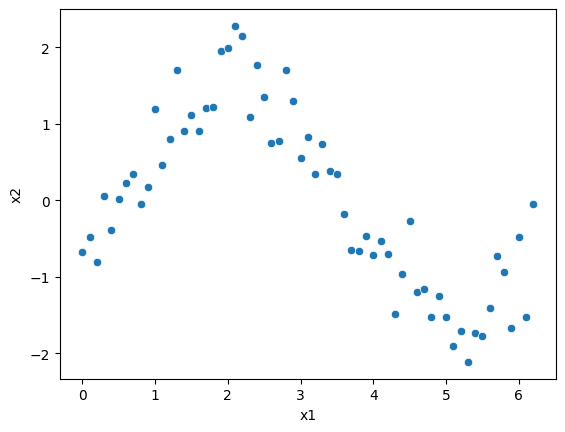

In [14]:
# Visualize regression_1 dataset
sns.scatterplot(x='x1', y='x2', data=regression_1)


<Axes: xlabel='x1', ylabel='x2'>

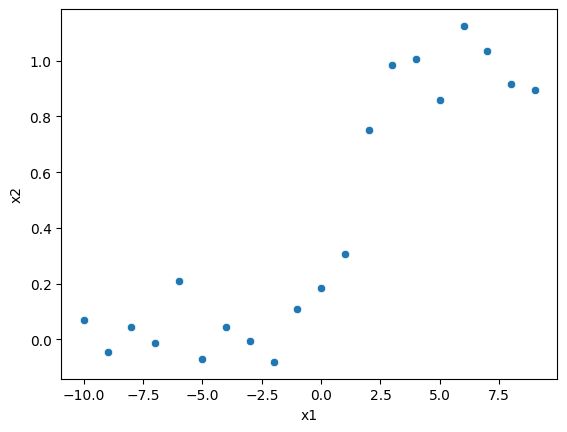

In [15]:
# Visualize regression_2 dataset
sns.scatterplot(x='x1', y='x2', data=regression_2)

<Axes: xlabel='x1', ylabel='x2'>

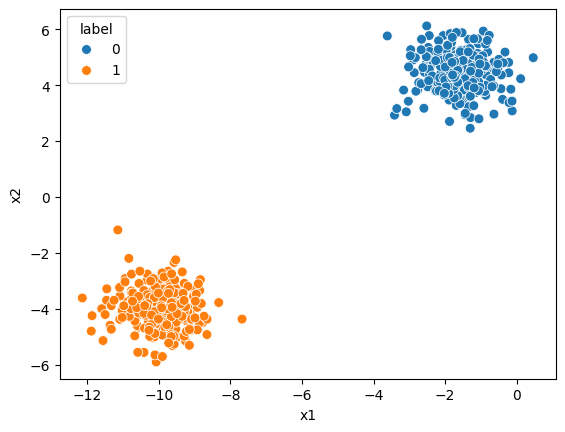

In [16]:
# Visualize classification dataset
sns.scatterplot(x='x1', y='x2', hue='label', data=classification, s=50)


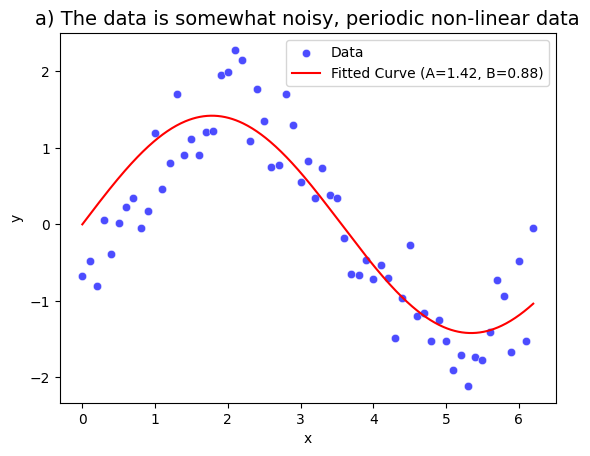

In [48]:
def sine_function(x, A, B):
    return A * np.sin(B * x)

x = regression_1['x1']
y = regression_1['x2']
params, _ = curve_fit(sine_function, x, y, p0=[1, 1])
A, B = params

x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = sine_function(x_fit, A, B)

sns.scatterplot(data=regression_1, x=x, y=y, color="blue", alpha=0.7, label="Data")
sns.lineplot(x=x_fit, y=y_fit, color="red", label=f"Fitted Curve (A={A:.2f}, B={B:.2f})")
plt.title("a) The data is somewhat noisy, periodic non-linear data", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
#plt.legend()
plt.show()


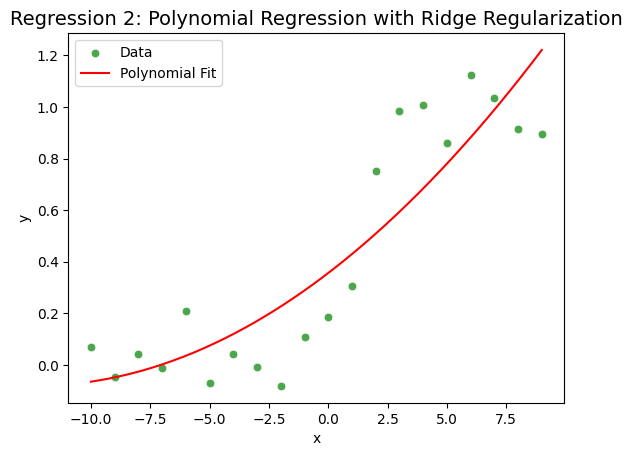

In [ ]:
from sklearn.pipeline import make_pipeline

# Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, Ridge(alpha=1.0))

# Train the model
x = regression_2[['x1']].values
y = regression_2['x2'].values
model.fit(x, y)

# Generate predictions
x_fit = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_fit = model.predict(x_fit)

# Plot with Seaborn
#sns.scatterplot(data=regression_2, x=x, y=y, color="green", alpha=0.7, label="Data")
sns.scatterplot(x=regression_2["x1"], y=regression_2["x2"], color="green", alpha=0.7, label="Data")
sns.lineplot(x=x_fit.ravel(), y=y_fit, color="red", label="Polynomial Fit")
plt.title("b) Data is quadratic and noisy", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


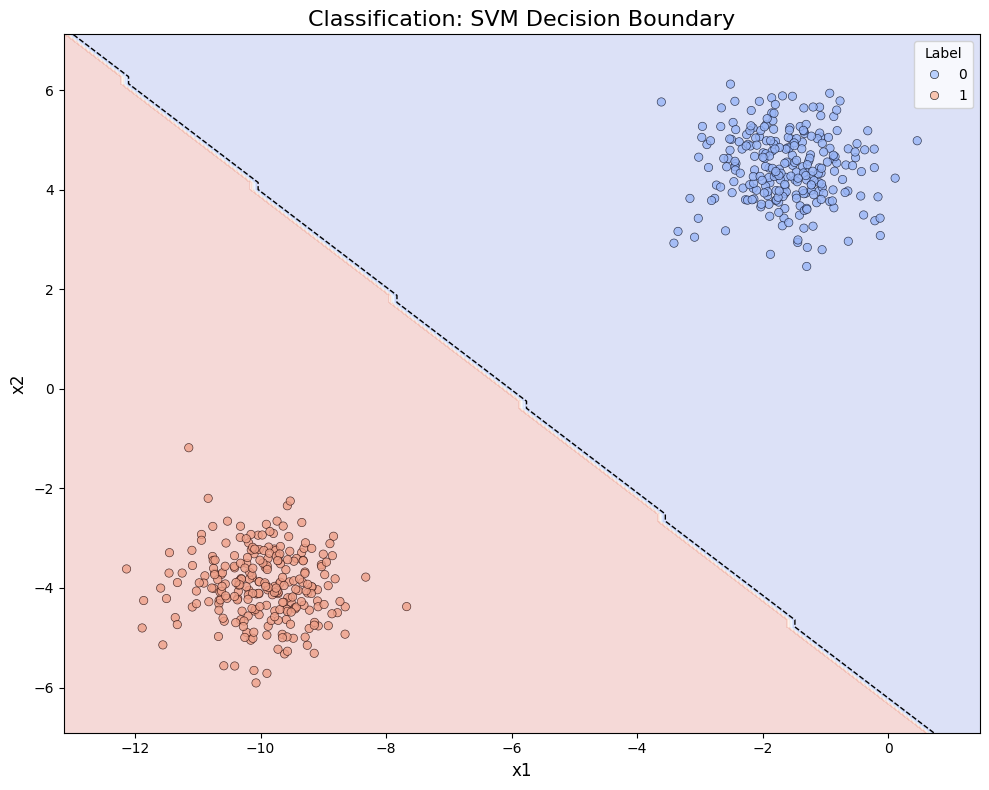

In [ ]:
# Train an SVM model
svc = SVC(kernel="linear")
x = classification[['x1', 'x2']]
y = classification['label']
svc.fit(x, y)

# Create a mesh grid for the decision boundary
xx, yy = np.meshgrid(
    np.linspace(x['x1'].min() - 1, x['x1'].max() + 1, 100),
    np.linspace(x['x2'].min() - 1, x['x2'].max() + 1, 100)
)

grid = np.c_[xx.ravel(), yy.ravel()]
preds = svc.predict(grid).reshape(xx.shape)

# Plot decision boundary and scatter points
plt.figure(figsize=(10, 8))

# Scatter plot of the data points
sns.scatterplot(data=classification, x="x1", y="x2", hue="label", palette="coolwarm", alpha=0.8, edgecolor="k")

# Contour plot for decision boundary
plt.contour(xx, yy, preds, levels=[0.5], colors='black', linestyles='--', linewidths=1)

# Background color to visualize regions
plt.contourf(xx, yy, preds, alpha=0.2, cmap="coolwarm")

# Titles and labels
plt.title("Classification: SVM Decision Boundary", fontsize=16)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend(title="Label")
plt.tight_layout()

# Display the plot
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


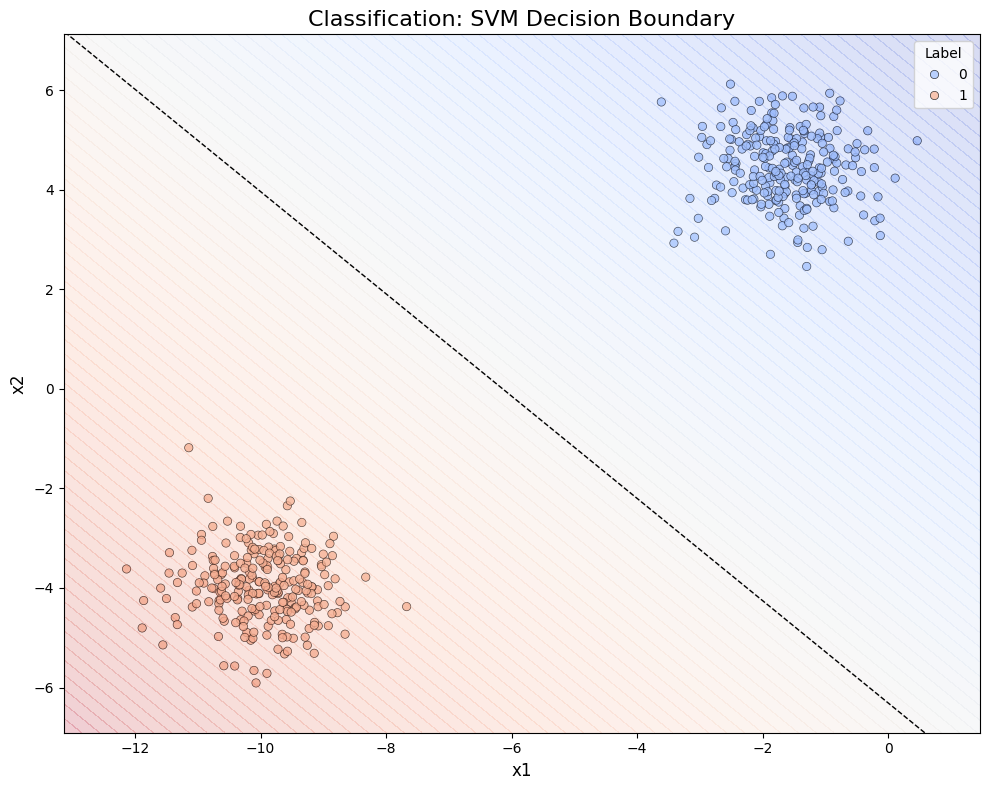

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM model
svc = SVC(kernel="linear")
x = classification[['x1', 'x2']]
y = classification['label']
svc.fit(x, y)

# Mesh grid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(x['x1'].min() - 1, x['x1'].max() + 1, 100),
    np.linspace(x['x2'].min() - 1, x['x2'].max() + 1, 100)
)

grid = np.c_[xx.ravel(), yy.ravel()]
decision_function = svc.decision_function(grid).reshape(xx.shape)

plt.figure(figsize=(10, 8))

sns.scatterplot(data=classification, x="x1", y="x2", hue="label", palette="coolwarm", alpha=0.8, edgecolor="k")


plt.contour(xx, yy, decision_function, levels=[0], colors='black', linestyles='--', linewidths=1)
plt.contourf(xx, yy, decision_function, alpha=0.2, cmap="coolwarm", levels=np.linspace(decision_function.min(), decision_function.max(), 100))

# Titles and labels
plt.title("Classification: SVM Decision Boundary", fontsize=16)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend(title="Label")
plt.tight_layout()

# Display the plot
plt.show()

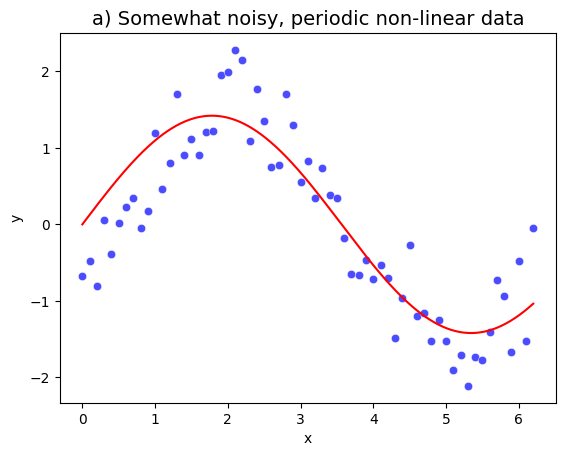

In [40]:
def sine_function(x, A, B):
    return A * np.sin(B * x)

x = regression_1['x1']
y = regression_1['x2']
params, _ = curve_fit(sine_function, x, y, p0=[1, 1])
A, B = params

x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = sine_function(x_fit, A, B)

sns.scatterplot(data=regression_1, x=x, y=y, color="blue", alpha=0.7, )
sns.lineplot(x=x_fit, y=y_fit, color="red", )
plt.title("a) Somewhat noisy, periodic non-linear data", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

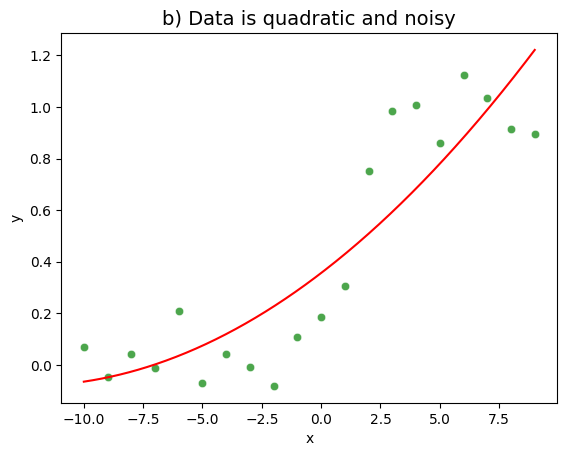

In [44]:
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, Ridge(alpha=1.0))

x = regression_2[['x1']].values
y = regression_2['x2'].values
model.fit(x, y)

x_fit = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_fit = model.predict(x_fit)

sns.scatterplot(x=regression_2["x1"], y=regression_2["x2"], color="green", alpha=0.7)
sns.lineplot(x=x_fit.ravel(), y=y_fit, color="red")
plt.title("b) Data is quadratic and noisy", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


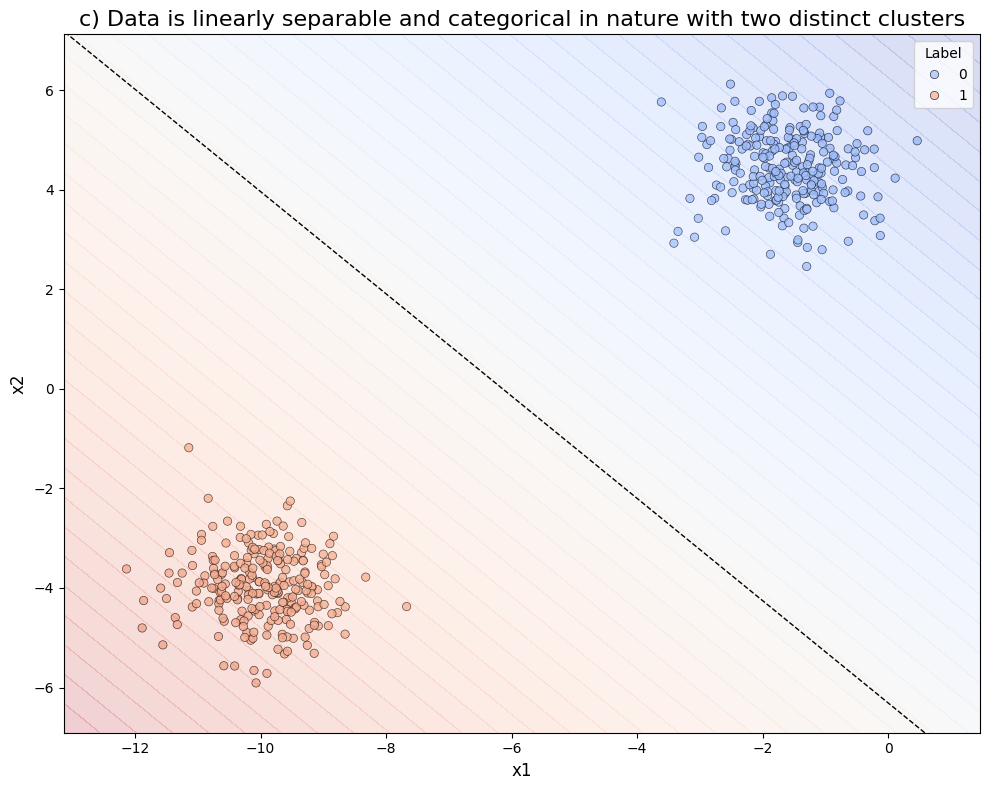

In [50]:
svc = SVC(kernel="linear")
x = classification[['x1', 'x2']]
y = classification['label']
svc.fit(x, y)
xx, yy = np.meshgrid(
    np.linspace(x['x1'].min() - 1, x['x1'].max() + 1, 100),
    np.linspace(x['x2'].min() - 1, x['x2'].max() + 1, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]
decision_function = svc.decision_function(grid).reshape(xx.shape)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=classification, x="x1", y="x2", hue="label", palette="coolwarm", alpha=0.8, edgecolor="k")
levels = np.linspace(decision_function.min(), decision_function.max())
plt.contour(xx, yy, decision_function, levels=[0], colors='black', linestyles='--', linewidths=1)
plt.contourf(xx, yy, decision_function, alpha=0.2, cmap="coolwarm", levels= levels)
plt.title("c) Data is linearly separable and categorical in nature with two distinct clusters", fontsize=16)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend(title="Label")
plt.tight_layout()
plt.show()